<a href="https://colab.research.google.com/github/unnabhr/Chaos-Computing/blob/main/Chaos_Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

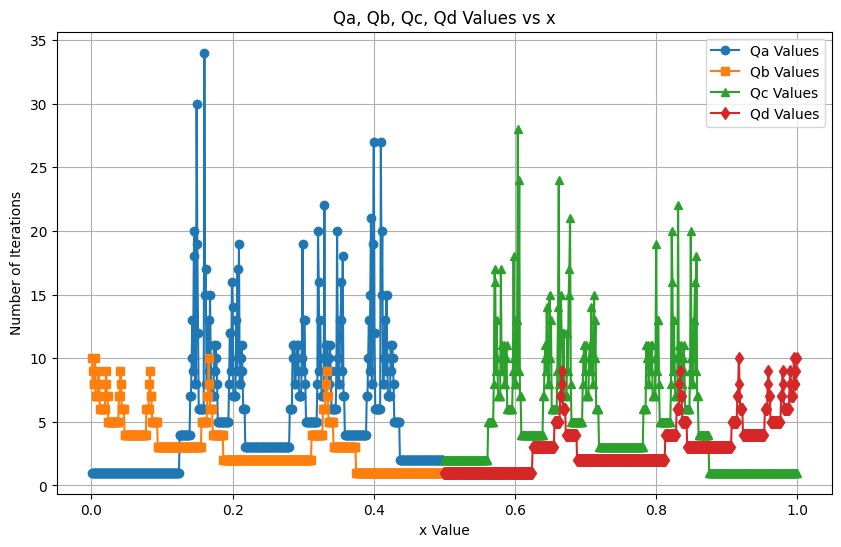

No common key found.


In [8]:
import math
from decimal import Decimal, getcontext
import matplotlib.pyplot as plt

# Set precision for Decimal calculations
getcontext().prec = 10

# Parameters
b = Decimal('0.499')
epsilon = Decimal('0.25')
epsilon_dash = Decimal('0.25')
precision = Decimal('0.001')

# Skew Tent Map function
def skew_tent(x):
    if 0 <= x < b:
        return x / b
    elif b <= x < 1:
        return (1 - x) / (1 - b)
    else:
        return Decimal('-1')  # Invalid input

# Finds the first time a value x hits the selected epsilon region
def first_hit_finder(x, i2, epsilon):
    count = 1
    temp = skew_tent(x)
    if i2 == 0:
        while temp > epsilon:
            temp = skew_tent(temp)
            count += 1
        return count
    else:
        while temp < 1 - epsilon:
            temp = skew_tent(temp)
            count += 1
        return count

# Computes the minimum common key: k present in the 4 vectors, returns k and the corresponding 4 q values
def find_optimum_k():
    # Generate qa_values for x in [0, b)
    qa_values = []
    for i in range(1, int(b / precision)):
        x = i * precision
        qa_values.append((first_hit_finder(x, 0, epsilon), float(x)))
    qa_values.sort(key=lambda x: x[1])  # Sort by x value

    # Generate qb_values for x in [0, b)
    qb_values = []
    for i in range(1, int(b / precision)):
        x = i * precision
        qb_values.append((first_hit_finder(x, 1, epsilon), float(x)))
    qb_values.sort(key=lambda x: x[1])  # Sort by x value

    # Generate qc_values for x in [b, 1)
    qc_values = []
    for i in range(int(b / precision), int(1 / precision)):
        x = i * precision
        qc_values.append((first_hit_finder(x, 0, epsilon), float(x)))
    qc_values.sort(key=lambda x: x[1])  # Sort by x value

    # Generate qd_values for x in [b, 1)
    qd_values = []
    for i in range(int(b / precision), int(1 / precision)):
        x = i * precision
        qd_values.append((first_hit_finder(x, 1, epsilon_dash), float(x)))
    qd_values.sort(key=lambda x: x[1])  # Sort by x value

    # Plot the values
    plt.figure(figsize=(10, 6))
    plt.plot([x[1] for x in qa_values], [x[0] for x in qa_values], label="Qa Values", marker='o')
    plt.plot([x[1] for x in qb_values], [x[0] for x in qb_values], label="Qb Values", marker='s')
    plt.plot([x[1] for x in qc_values], [x[0] for x in qc_values], label="Qc Values", marker='^')
    plt.plot([x[1] for x in qd_values], [x[0] for x in qd_values], label="Qd Values", marker='d')
    plt.xlabel("x Value")
    plt.ylabel("Number of Iterations")
    plt.title("Qa, Qb, Qc, Qd Values vs x")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Find the smallest common x value in all four lists
    i = j = k = l = 0
    while i < len(qa_values) and j < len(qb_values) and k < len(qc_values) and l < len(qd_values):
        min_common = min(qa_values[i][1], qb_values[j][1], qc_values[k][1], qd_values[l][1])
        if (qa_values[i][1] == min_common and qb_values[j][1] == min_common and
            qc_values[k][1] == min_common and qd_values[l][1] == min_common):
            return {
                "Common Key": min_common,
                "Qa value": qa_values[i][0],
                "Qb value": qb_values[j][0],
                "Qc value": qc_values[k][0],
                "Qd value": qd_values[l][0]
            }

        # Increment indices for the vectors with the minimum value
        if qa_values[i][1] == min_common:
            i += 1
        if qb_values[j][1] == min_common:
            j += 1
        if qc_values[k][1] == min_common:
            k += 1
        if qd_values[l][1] == min_common:
            l += 1

    return None  # No common key found

def main():
    result = find_optimum_k()
    if result:
        print("Common Key:", result["Common Key"])
        print("Qa value:", result["Qa value"])
        print("Qb value:", result["Qb value"])
        print("Qc value:", result["Qc value"])
        print("Qd value:", result["Qd value"])
    else:
        print("No common key found.")

if __name__ == "__main__":
    main()